In [1]:
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df['date']=pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

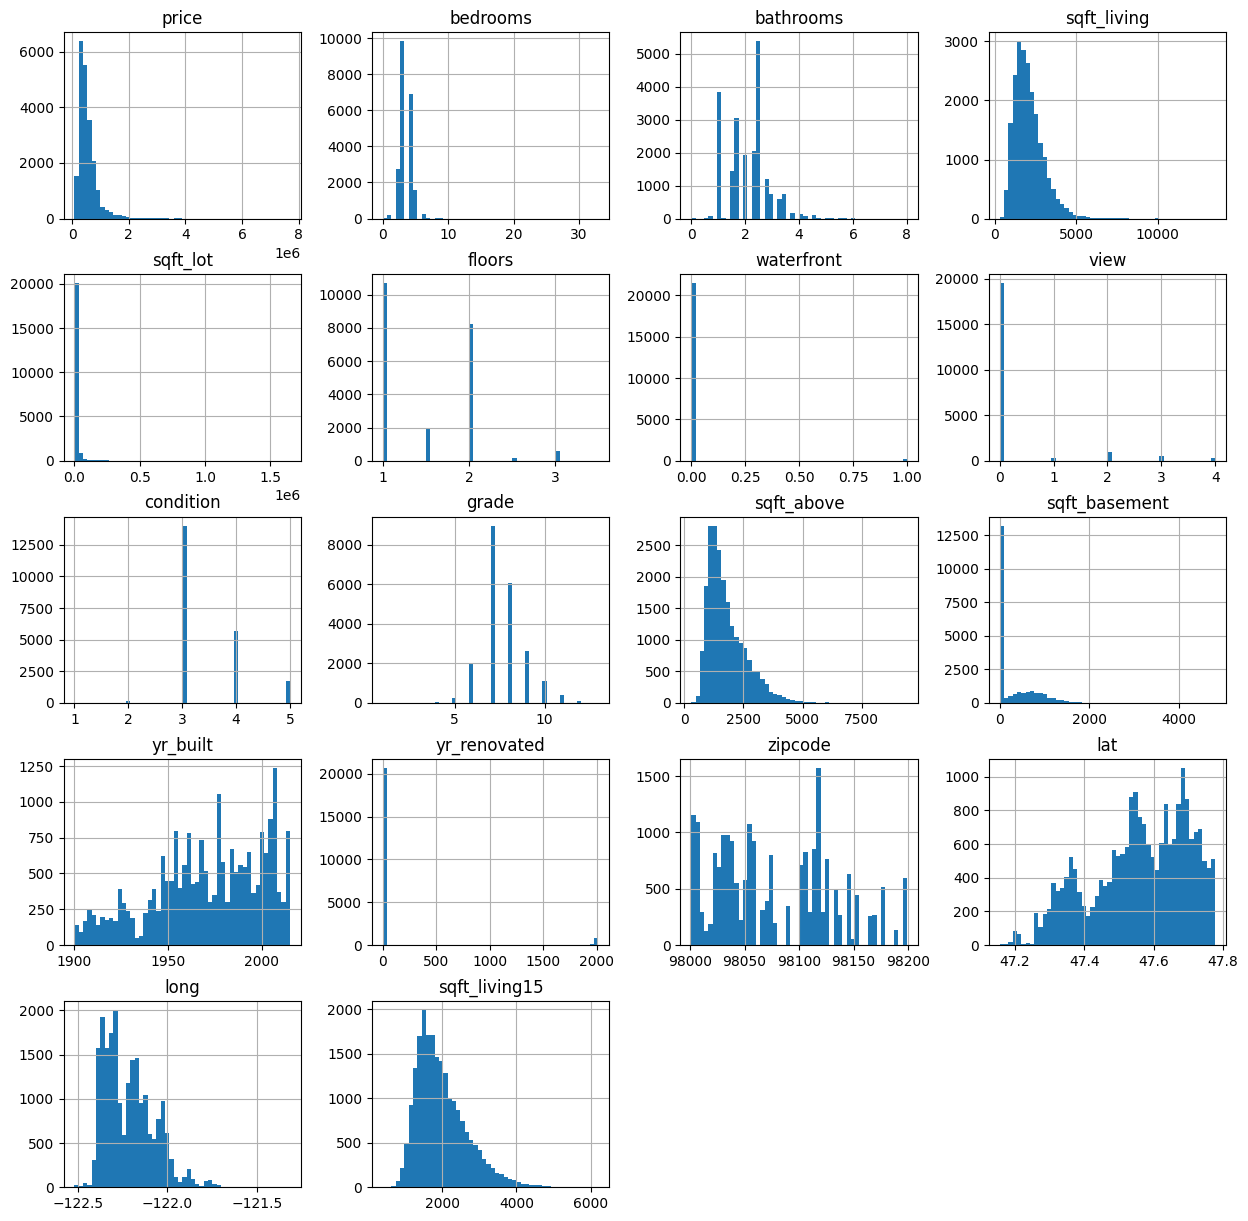

In [5]:
df.drop(columns=['date', 'id', 'sqft_lot15']).hist(bins=50,figsize=(15,15))
plt.show()

<Axes: xlabel='waterfront', ylabel='price'>

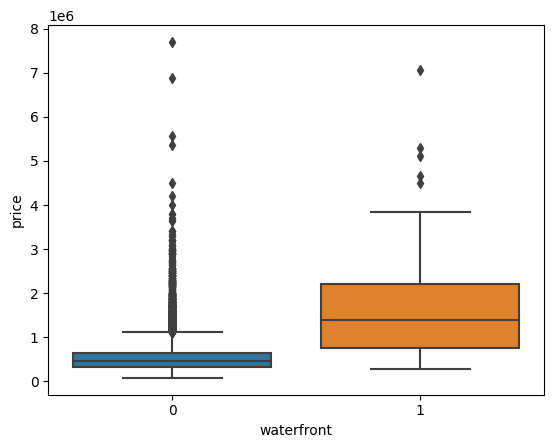

In [6]:
sns.boxplot(data=df,x=df['waterfront'],y=df['price'])

<Axes: xlabel='sqft_above', ylabel='price'>

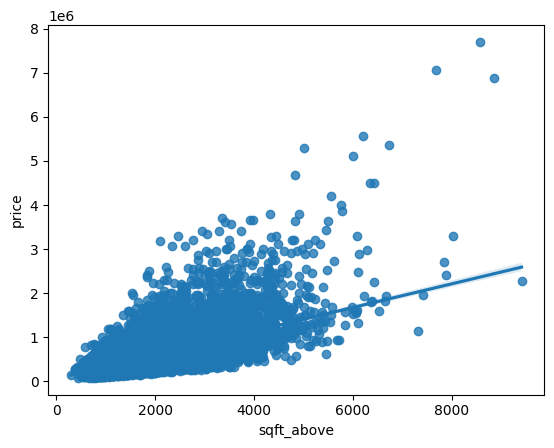

In [7]:
sns.regplot(data=df,x=df['sqft_above'],y=df['price'])

(21.5, -0.5)

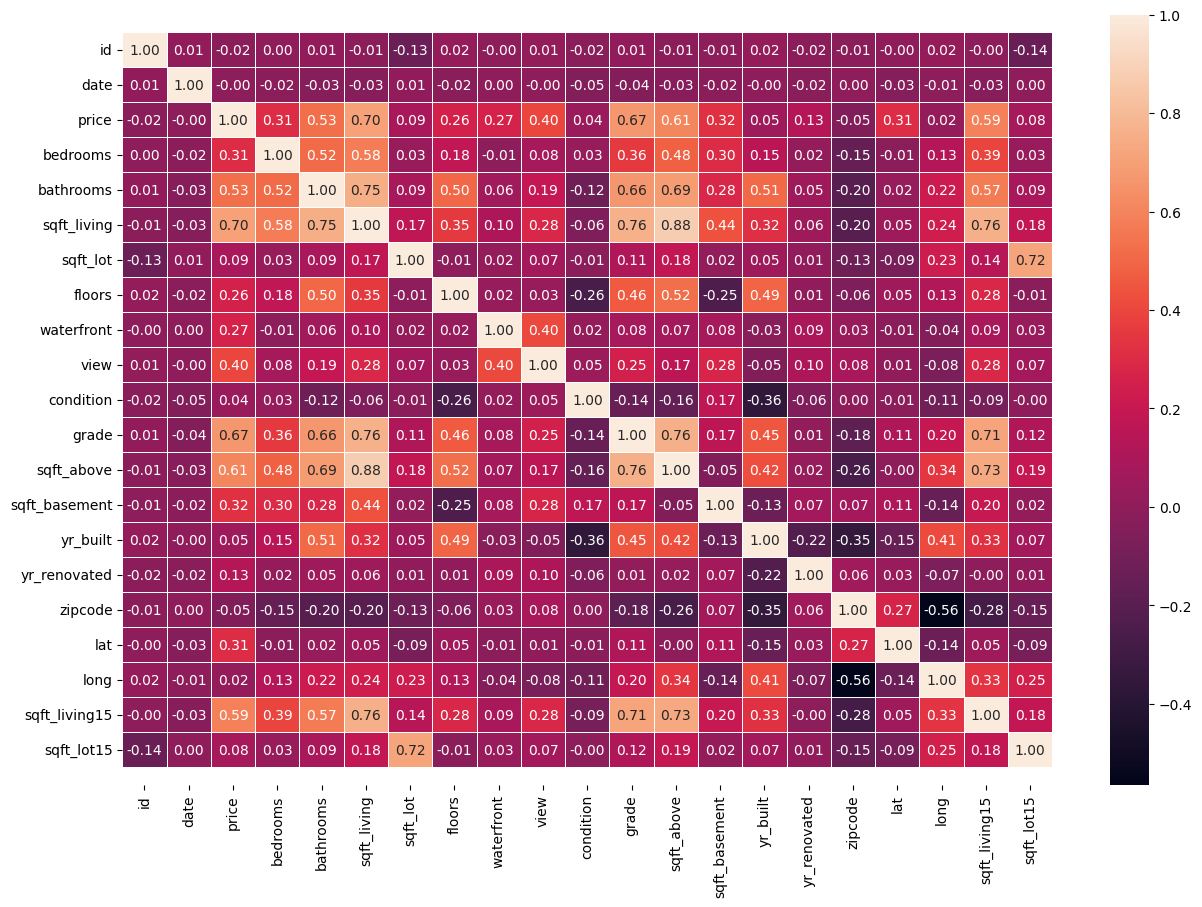

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
X = df.drop(columns=['price', 'date'])  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE)

R2_Score = r2_score(y_test,y_pred)
print('R2 Score is : ', R2_Score)

Root Mean Squared Error: 147943.0977487057
R2 Score is :  0.8552213509293962


In [12]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [13]:
data.shape
data.head()
data.tail()
print(data.columns.values)
data.isnull().any()
data.info()

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 1

In [14]:
data = data.drop('id', axis=1)
data = data.drop('zipcode',axis=1)
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month


data = data.drop("date",axis=1)

data.sample()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
5542,428400.0,4,2.5,2650,6000,2.0,0,0,3,9,2650,0,2000,0,47.3768,-122.028,2630,6381,2014,9


In [15]:
desc_stats = data.describe().T

# Create a custom style for the DataFrame visualization
def custom_style(val):
    color = '#606ff2'
    return f'background-color: {color}; color: white'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply background gradient to 'std' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['std'], cmap='PuBu')

# Apply background gradient to '50%' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['50%'], cmap='PuBu')

# Display the styled descriptive statistics DataFrame
styled_desc_stats

,count,mean,std,min,25%,50%,75%,max
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000
grade,21613.000000,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,13.000000


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

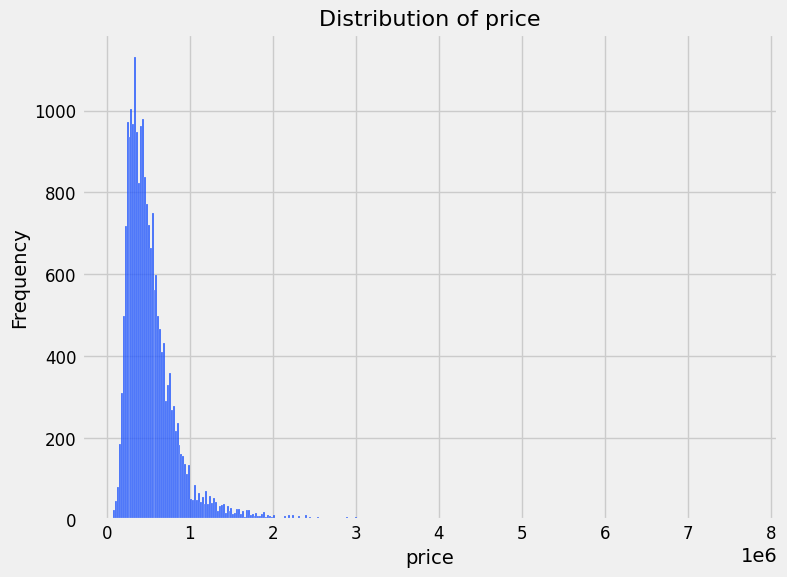

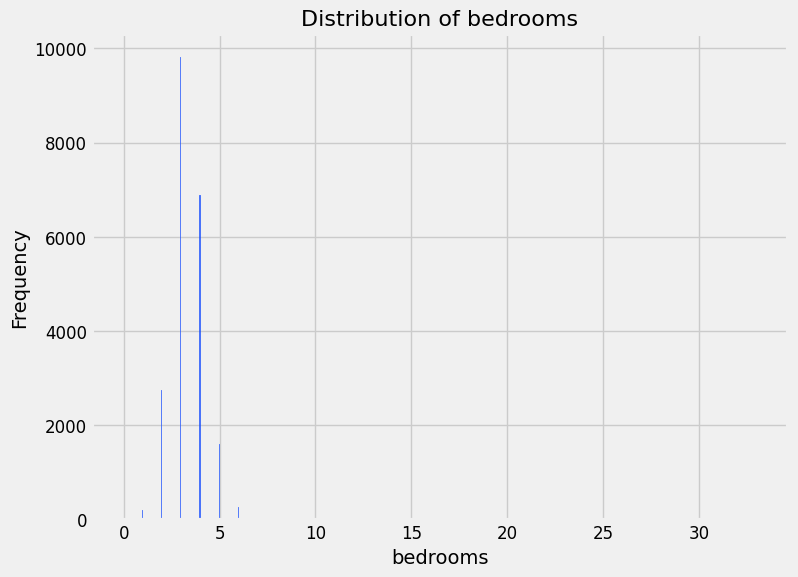

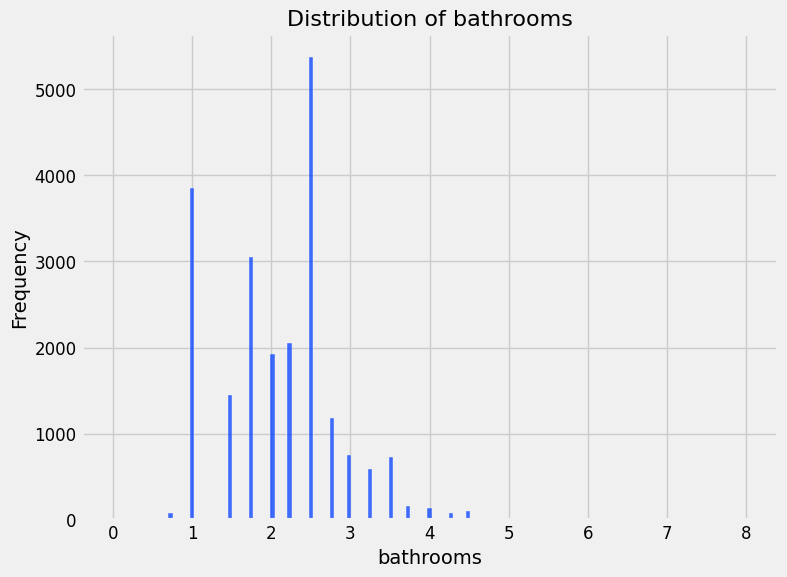

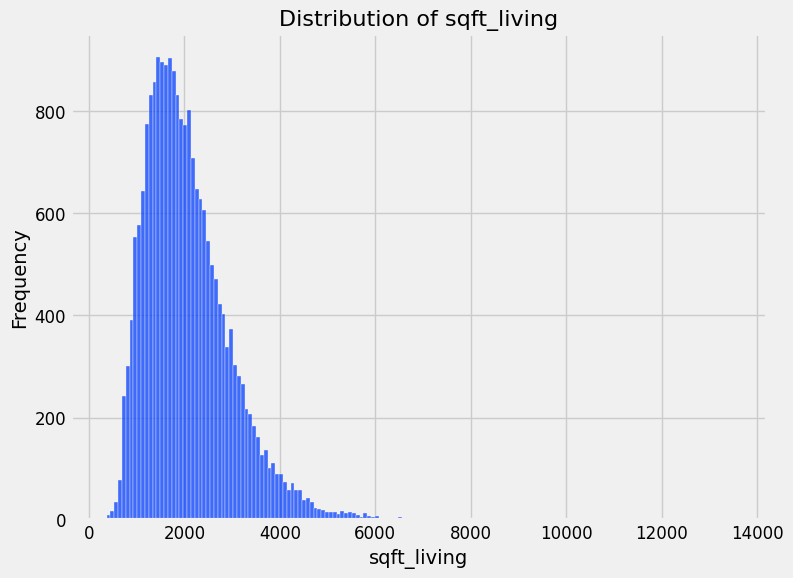

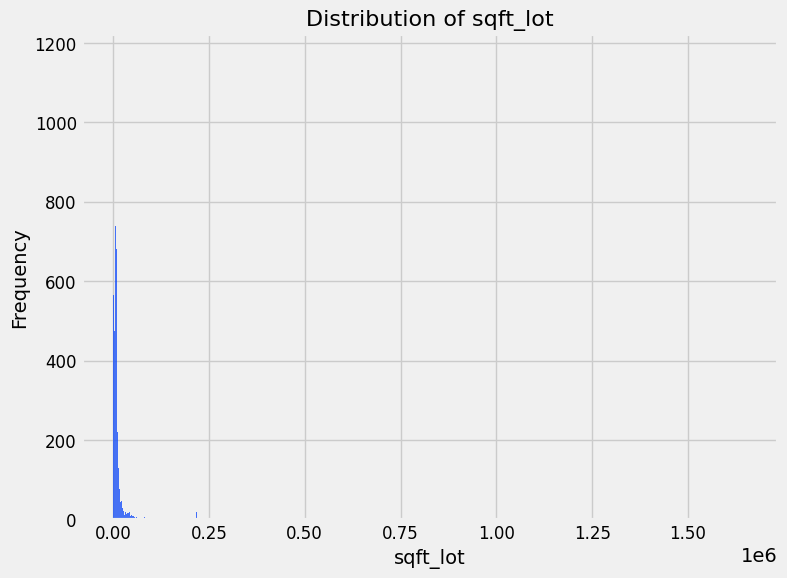

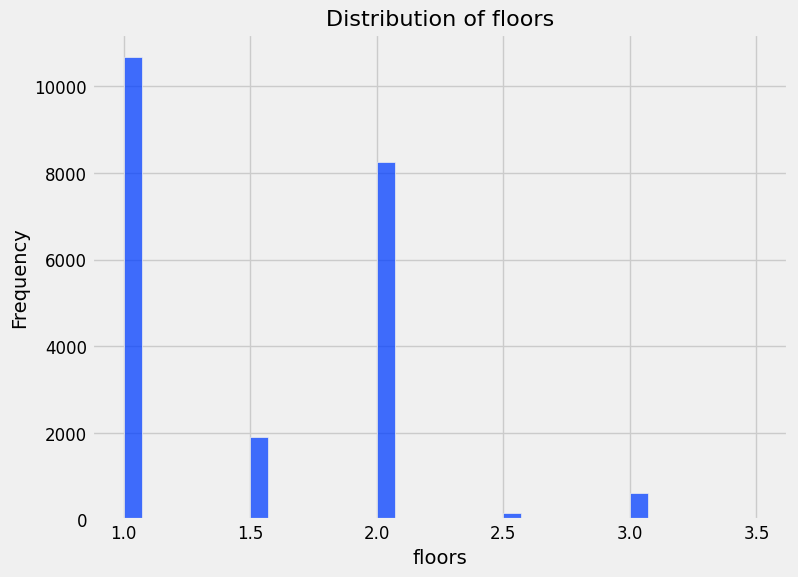

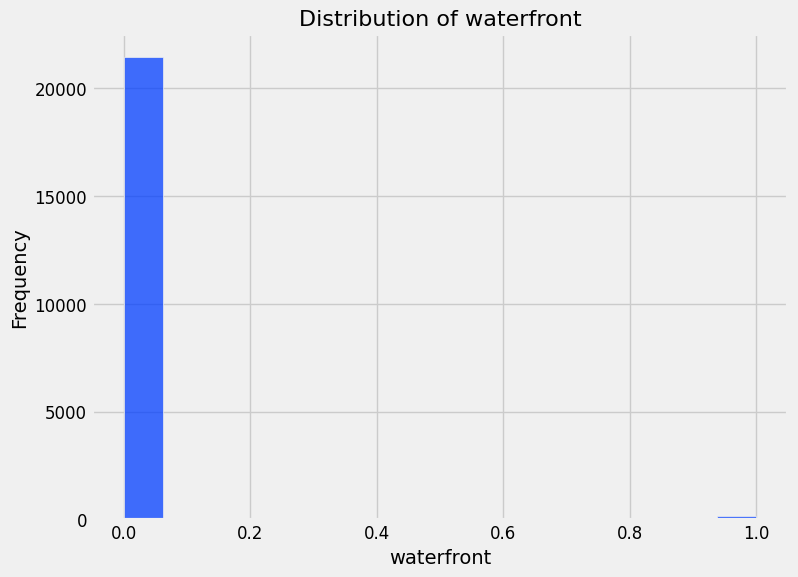

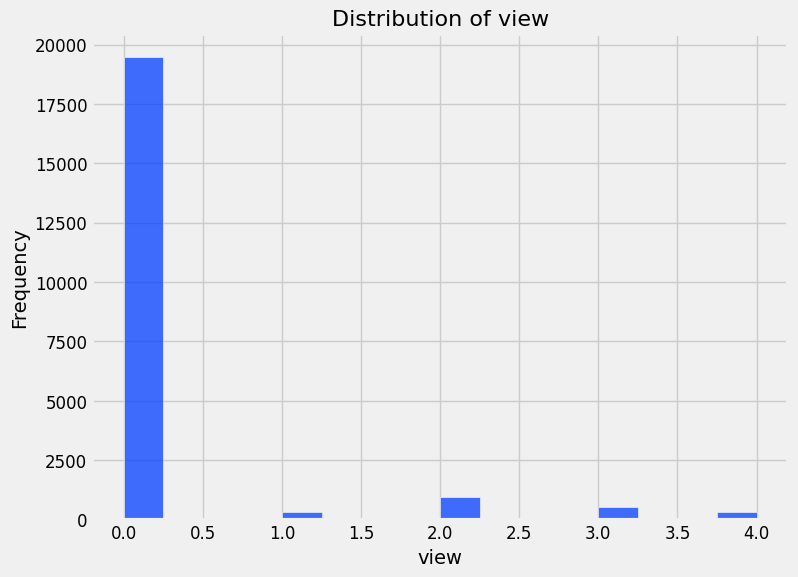

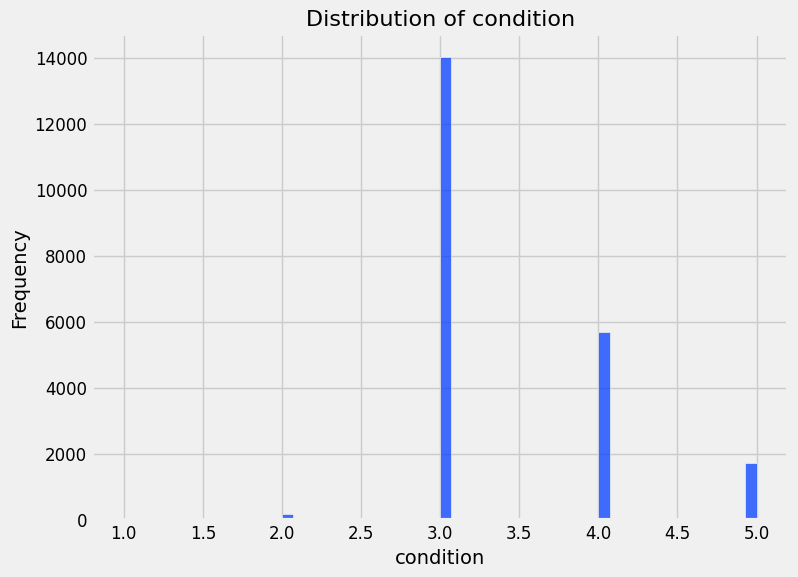

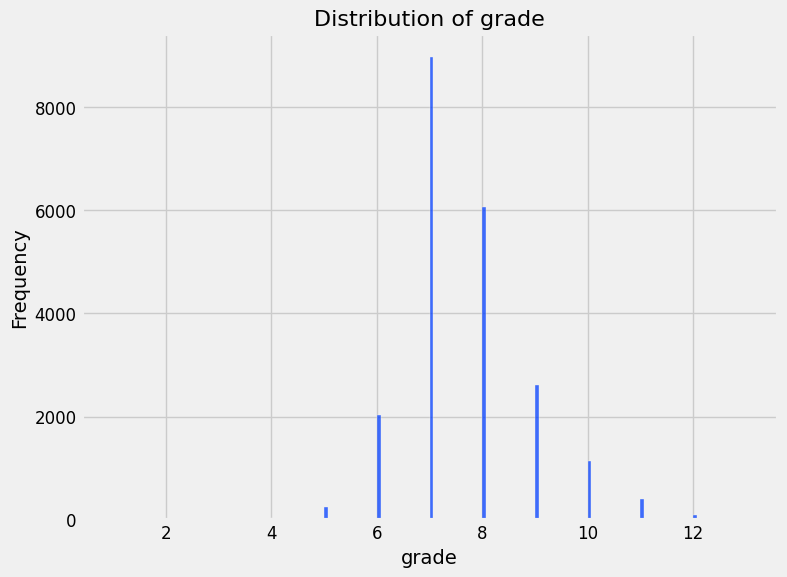

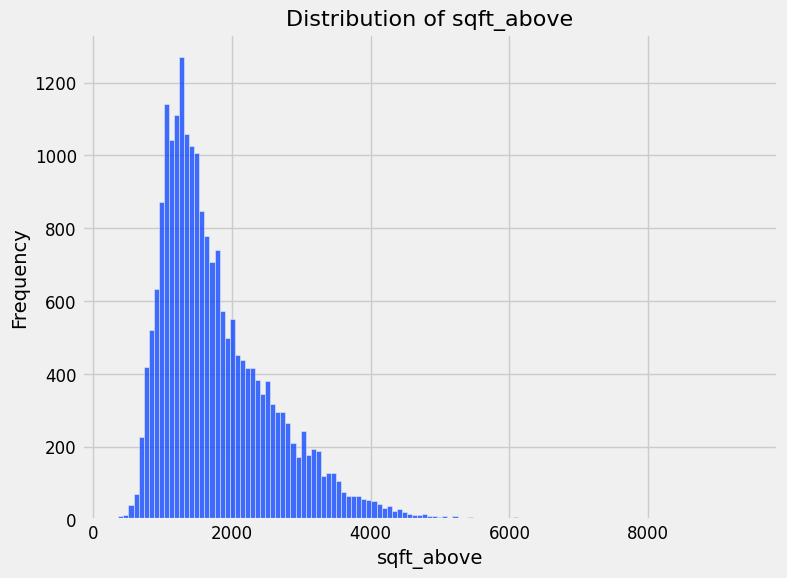

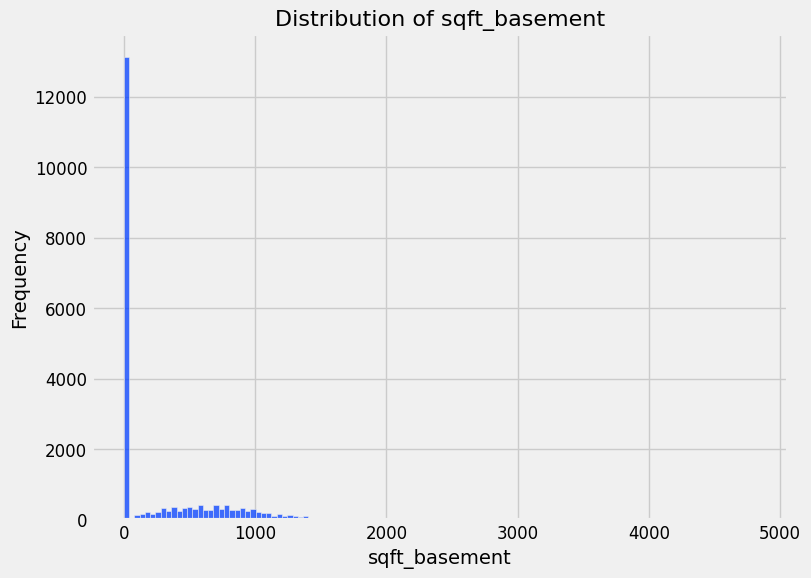

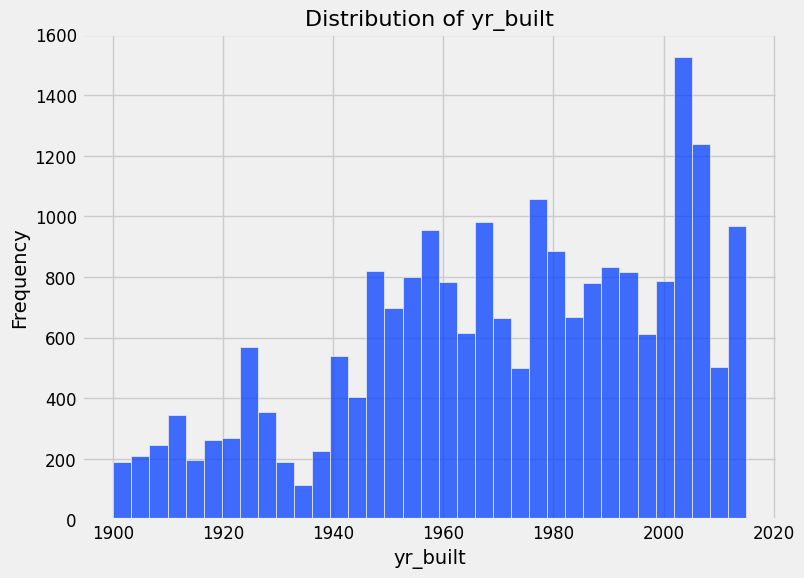

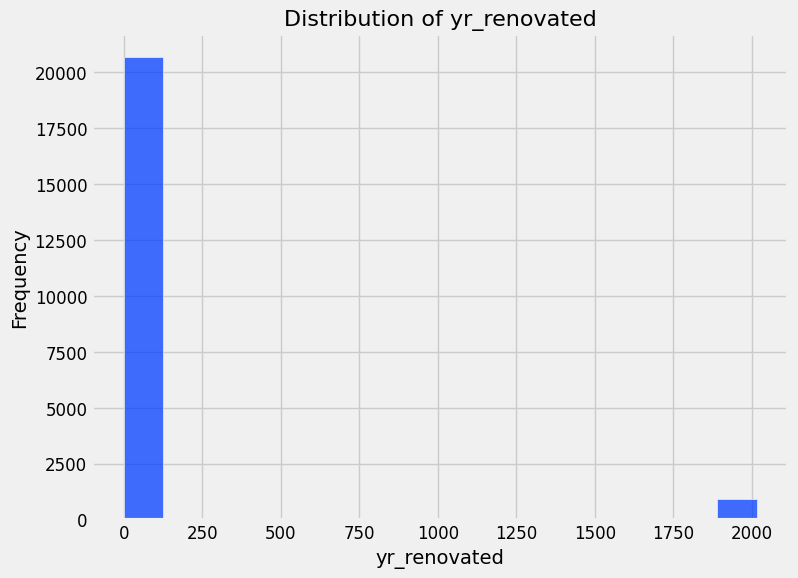

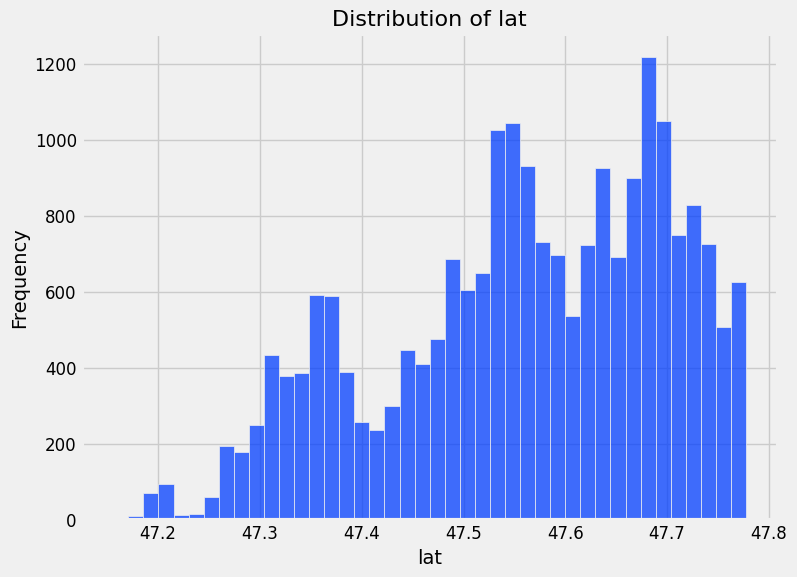

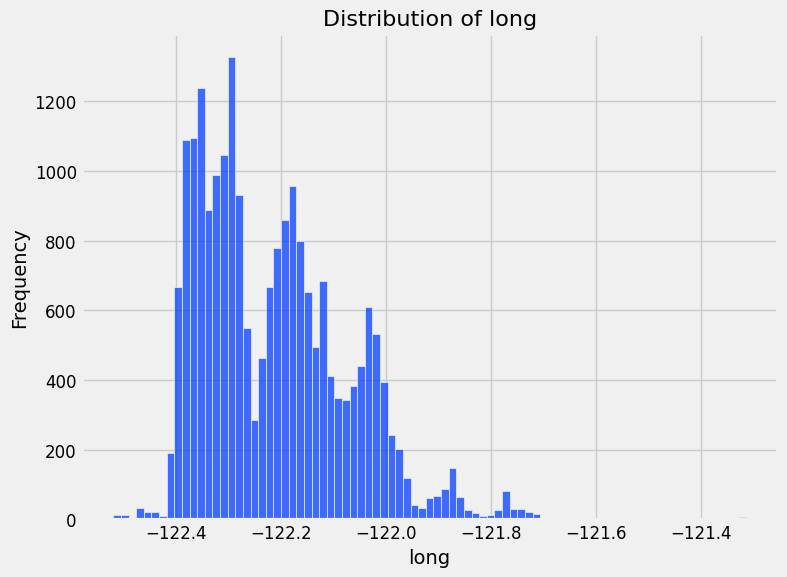

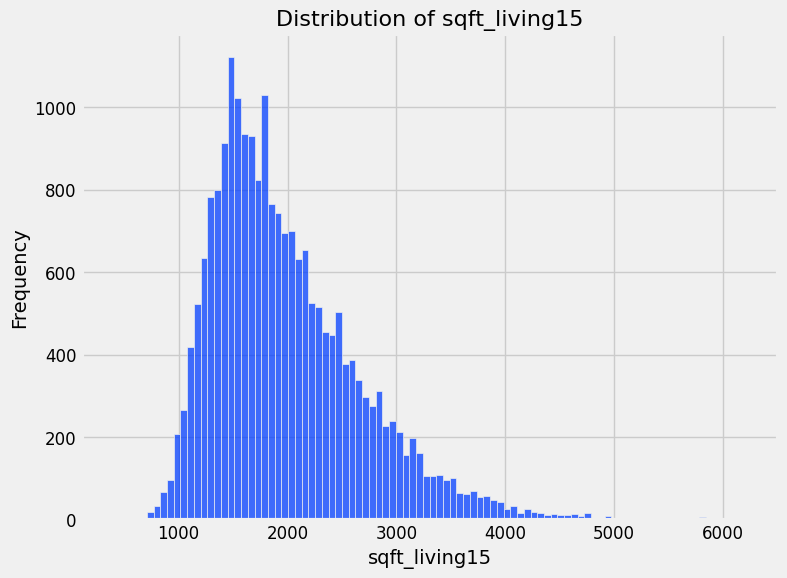

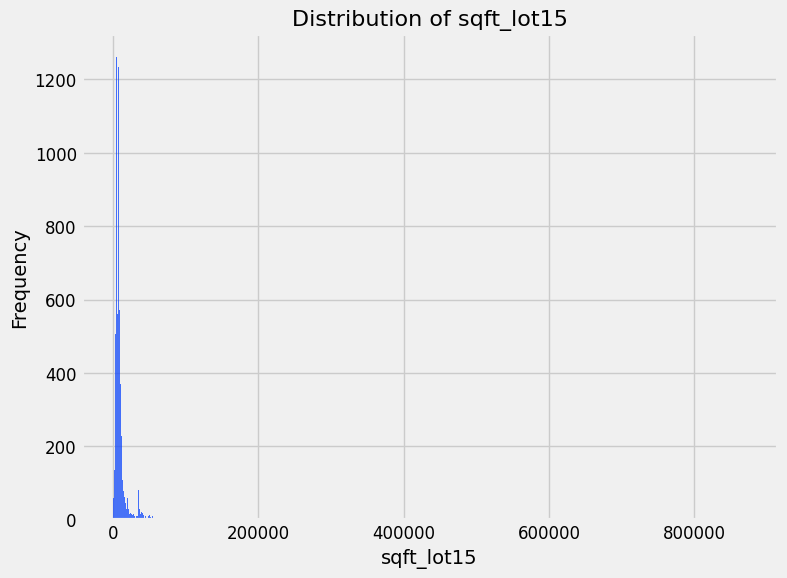

In [16]:
# List of columns in the data
columns = ['month', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
           'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']

# Using the "fivethirtyeight" style
plt.style.use('fivethirtyeight')
sns.set_palette("bright")

for column in columns:
    plt.figure(figsize=(8, 6))
    
    if data[column].dtype == 'int64' or data[column].dtype == 'float64':
        # Numerical columns
        plt.title(f'Distribution of {column}', fontsize=16)
        sns.histplot(data=data[column])
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        
    elif data[column].dtype == 'object':
        # Categorical columns
        plt.title(f'Count of {column}', fontsize=16)
        sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

<Axes: title={'center': 'Pearson Correlation Matrix'}>

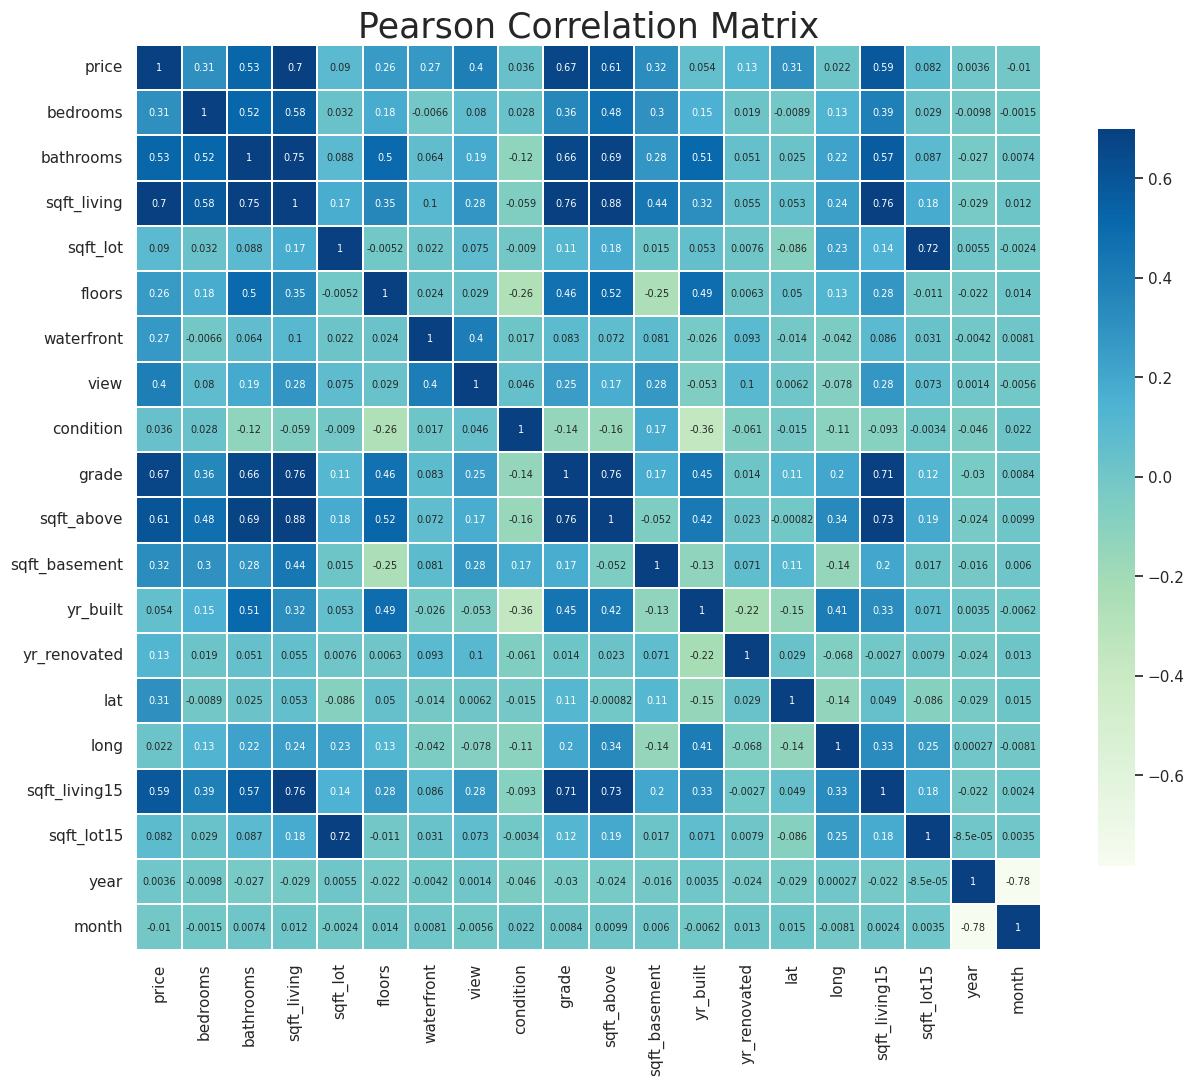

In [17]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [18]:
price_corr = data.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
Name: price, dtype: float64


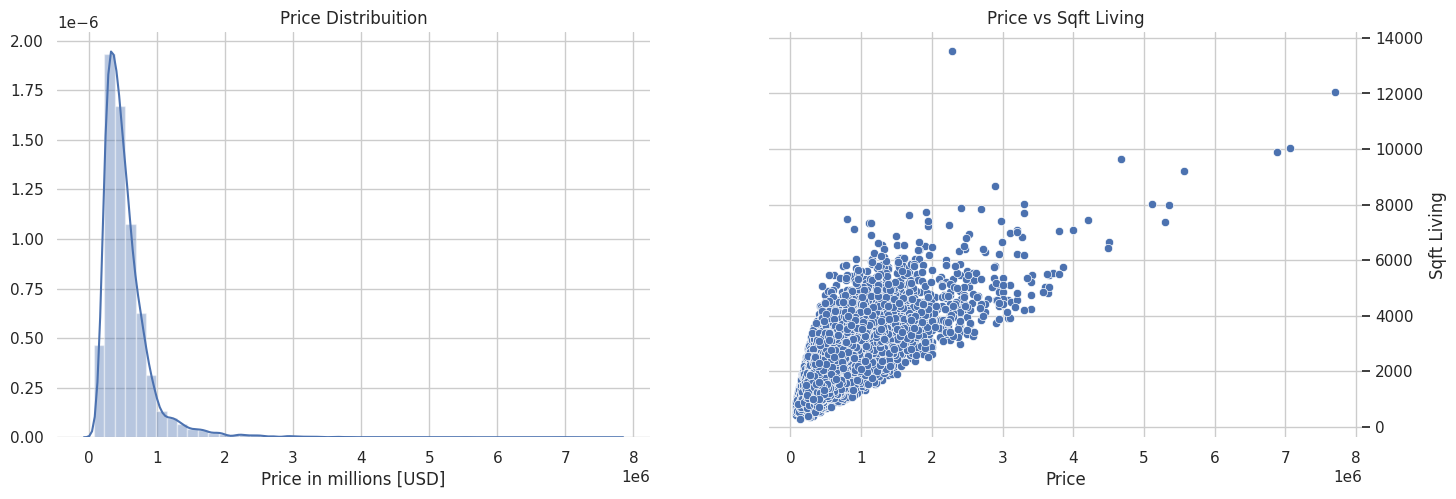

In [19]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

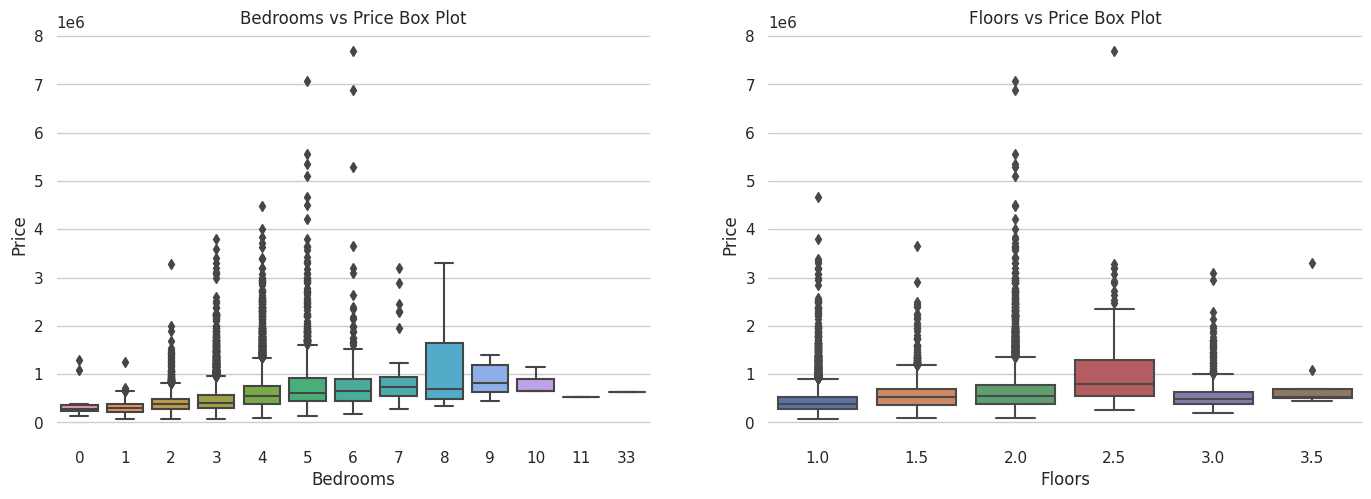

In [20]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['bedrooms'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['floors'],y=data['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot');

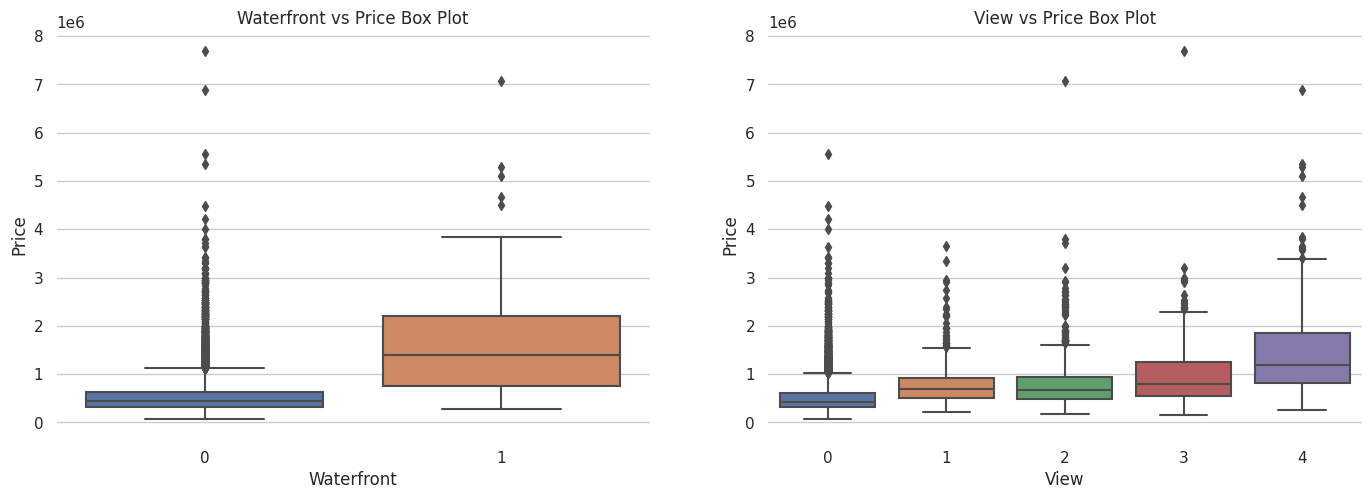

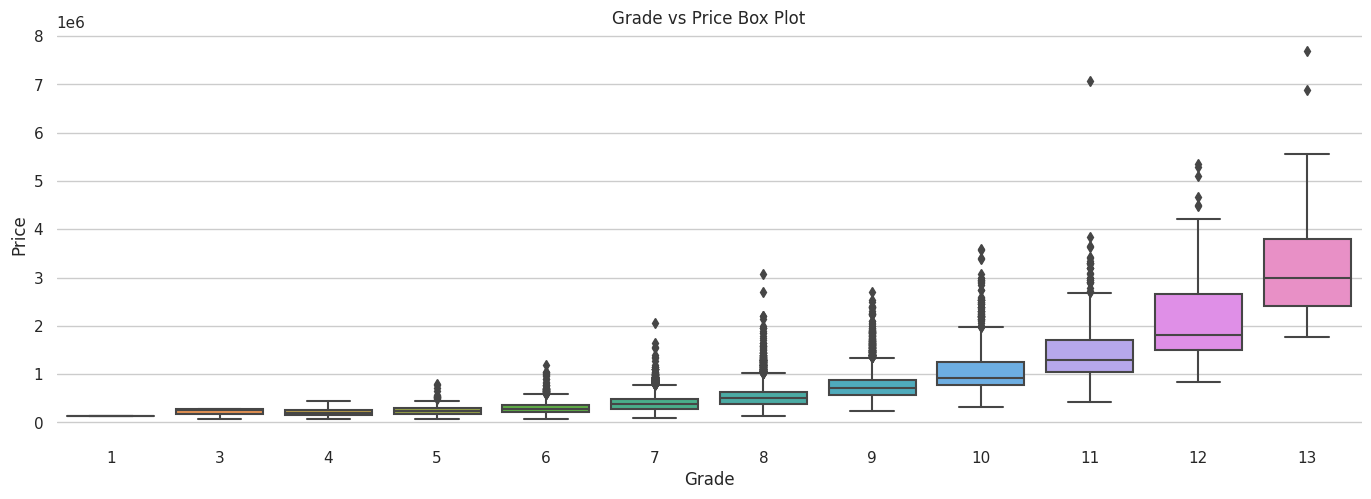

In [21]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['waterfront'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['view'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=data['grade'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot');

In [22]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat="lat",
    lon= "long",
    color="condition",
    center={"lat": data["lat"].mean(), "lon": data["long"].mean()},  # Center map based on data mean
    width=800,  # Width of map
    height=600,  # Height of map
    hover_data=["price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [23]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [24]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [25]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
136/136 [==============================] - 2s 5ms/step - loss: 419826761728.0000 - val_loss: 452855496704.0000
Epoch 2/400
136/136 [==============================] - 0s 3ms/step - loss: 416639123456.0000 - val_loss: 440067522560.0000
Epoch 3/400
136/136 [==============================] - 0s 3ms/step - loss: 364634374144.0000 - val_loss: 319982469120.0000
Epoch 4/400
136/136 [==============================] - 0s 3ms/step - loss: 188829007872.0000 - val_loss: 128464732160.0000
Epoch 5/400
136/136 [==============================] - 0s 3ms/step - loss: 100427767808.0000 - val_loss: 112360669184.0000
Epoch 6/400
136/136 [==============================] - 0s 3ms/step - loss: 96625442816.0000 - val_loss: 110175027200.0000
Epoch 7/400
136/136 [==============================] - 0s 3ms/step - loss: 94525505536.0000 - val_loss: 107580112896.0000
Epoch 8/400
136/136 [==============================] - 0s 3ms/step - loss: 92345638912.0000 - val_loss: 104993251328.0000
Epoch 9/400
136/136

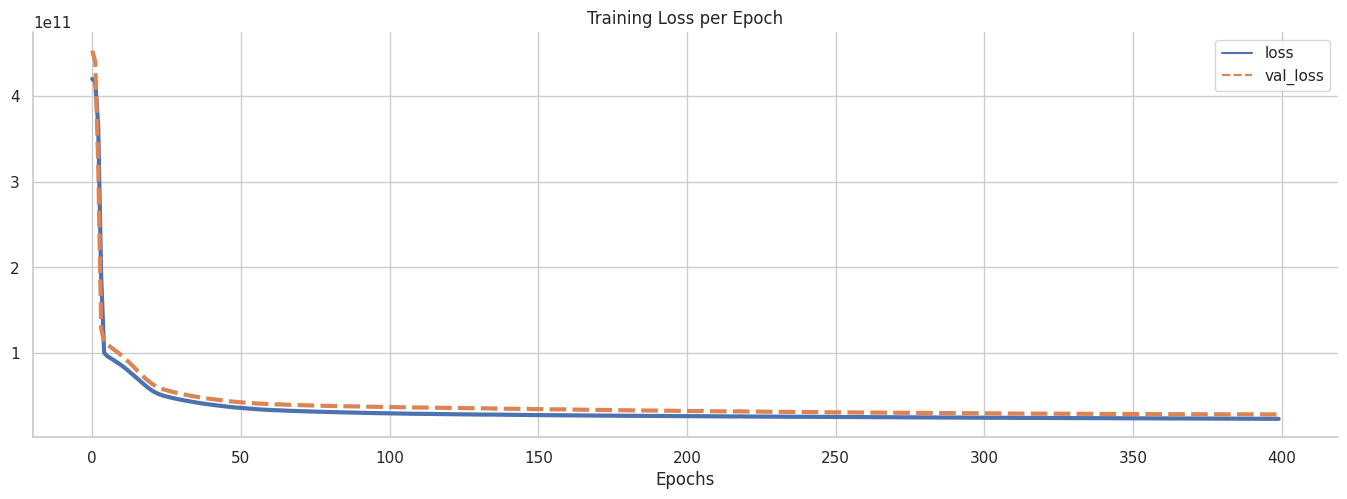

In [26]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [27]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',data['price'].describe())

136/136 [==============================] - 0s 2ms/step
MAE:  103304.45285934248
MSE:  28625132080.56427
RMSE:  169189.63349024748
Variance Regression Score:  0.8108859773004867


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


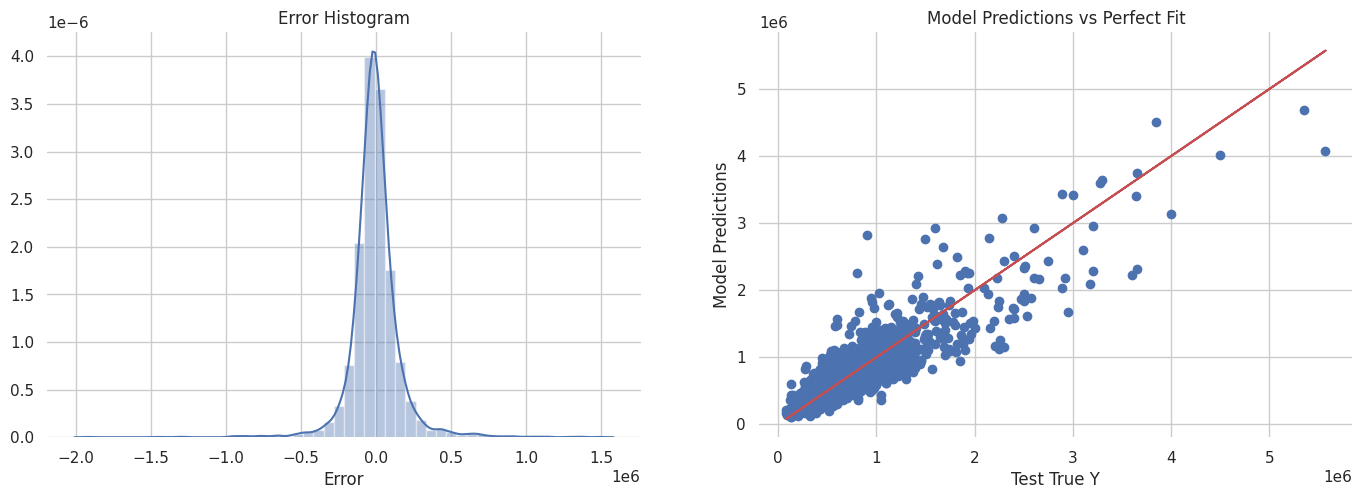

In [29]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(-1, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit');